## Table of Contents

* [Using Machine Learning to Predict Fire Damage](#)
  * [Table of Contents](#)
  * [Introduction](#introduction)
  * [Goal](#goal)
  * [Summary](#summary)
  * [The Data](#the_data)
      * [Legend](#)
  * [Data Processing](#data_processing)
    * [area](#area_cleaning)
    * [Categorical Features](#categorical_features)
      * [month](#month_cleaning)
      * [day](#day_cleaning)
      * [Generating Dummies](#generating_dummies)
    * [Dealing with Missing Data](#dealing_with_missing_data)
    * [Detecting Outliers](#detecting_outliers)
      * [FFMC](#ffmc_outliers)
      * [ISI](#isi_outliers)
      * [Rain](#rain_outliers)
    * [Removing Outliers](#removing_outliers)
    * [Dropping Features](#dropping_features)
    * [Standardizing the Data](#standardizing_the_data)
  * [Subset Selection](#subset_selection)
    * [Forward Selector](#forward_selector)
    * [Backward Selector](#backward_selector)
  * [Developing Candidate Models](#developing_candidate_models)
    * [LASSO](#lasso)
    * [Decision Tree](#decision_tree)
  * [K-Fold Cross-Validation Tree](#k_fold_cross_validation)
  * [Conclusion](#conclusion)


## Introduction  <a name="introduction"></a>

In recent years, the frequency and severity of wildfires have escalated, causing widespread damage to ecosystems, property, and human life. Accurate prediction of fire damage is crucial for effective disaster management and resource allocation. The project aims to harness the power of machine learning techniques to develop a predictive model that can reliably estimate the extent of fire damage based on various environmental and situational factors.\
By leveraging advanced data analysis and modeling methods, I seek to create a tool that aids in mitigating the adverse impacts of wildfires, improving response strategies, and ultimately saving lives and resources.\
This project will involve a systematic approach to data preprocessing, feature selection, and model evaluation to identify the most effective predictive model.

## Goal  <a name="goal"></a>

The goal of this project is to develop and evaluate multiple machine learning models to identify the most effective one for predicting fire damage accurately. By rigorously testing and comparing various models, I aim to achieve a model with a satisfactory accuracy score, capable of providing reliable predictions based on the input features. A model with an MSE (Mean Squared Error) that equals less than 20% of the target's range will be satisfactory for this project.

## Summary  <a name="summary"></a>

Despite extensive feature selection and modeling efforts, the project failed to achieve satisfactory predictive accuracy due to low correlation between features and the log-transformed target variable.

## The Data <a name="the_data"></a>

The [dataset](https://archive.ics.uci.edu/dataset/162/forest+fires) contains information about forest fires in the northeast region of Portugal collected for a [paper](https://www.semanticscholar.org/paper/A-data-mining-approach-to-predict-forest-fires-data-Cortez-Morais/0f529dc2b2b2bad22394454d4cba79e2c319f0b0) published in 2007
It's been created by Paulo Cortez and Anbal Morais and uploaded to the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/) under the [Creative Commons Attribution 4.0 International license](https://creativecommons.org/licenses/by/4.0/legalcode).

The following is some boilerplate code that loads the required libraries, reads the data and displays some initial information about it:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split, cross_val_score#,  GridSearchCV, StratifiedKFold
#from sklearn.tree import DecisionTreeClassifier, plot_tree
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, make_scorer
#from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

plt.style.use('seaborn-v0_8')

In [2]:
# Reading the file
data = pd.read_csv("fires.csv")

In [3]:
data.shape

(517, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  517 non-null    int64  
 1   X           517 non-null    int64  
 2   Y           517 non-null    int64  
 3   month       517 non-null    object 
 4   day         517 non-null    object 
 5   FFMC        469 non-null    float64
 6   DMC         496 non-null    float64
 7   DC          474 non-null    float64
 8   ISI         515 non-null    float64
 9   temp        496 non-null    float64
 10  RH          487 non-null    float64
 11  wind        482 non-null    float64
 12  rain        485 non-null    float64
 13  area        517 non-null    float64
dtypes: float64(9), int64(3), object(2)
memory usage: 56.7+ KB


In [5]:
data.head()

,Unnamed: 0,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1,7,5,mar,fri,86.2,26.2,94.3,5.1,NaN,51.0,6.7,0.0,0.0
1,2,7,4,oct,tue,90.6,NaN,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,3,7,4,oct,sat,90.6,43.7,NaN,6.7,14.6,33.0,1.3,0.0,0.0
3,4,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,5,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,NaN,0.0,0.0


In [6]:
data.describe()

,Unnamed: 0,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,469.000000,496.000000,474.000000,515.000000,496.000000,487.000000,482.000000,485.000000,517.000000
mean,259.000000,4.669246,4.299807,90.580384,111.195363,550.673418,9.018835,18.884677,44.381930,4.021784,0.023093,12.847292
std,149.389312,2.313778,1.229900,5.698137,64.008450,246.061309,4.564890,5.748318,16.180372,1.794460,0.305532,63.655818
min,1.000000,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,130.000000,3.000000,4.000000,90.200000,70.800000,441.200000,6.450000,15.475000,33.000000,2.700000,0.000000,0.000000
50%,259.000000,4.000000,4.000000,91.600000,108.300000,664.500000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,388.000000,7.000000,5.000000,92.800000,141.575000,713.900000,10.750000,22.725000,53.500000,4.900000,0.000000,6.570000
max,517.000000,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


The dataset has 517 observations, each with 13 features (excluding `Unnamed: 0` which is simply the observation's index).

8 of the features have missing values, so that'll require further investigation.

There are no obvious outliers in the dataset.

The features are as follows:

| Variable Name | Role    | Type        | Description                                              | Units           | Values           |
| ------------- | ------- | ----------- | -------------------------------------------------------- | --------------- | ---------------- |
| X             | Feature | Integer     | x-axis spatial coordinate within the Montesinho park map |                 | `1`-`9`          |
| Y             | Feature | Integer     | y-axis spatial coordinate within the Montesinho park map |                 | `2`-`9`          |
| month         | Feature | Categorical | month of the year                                        |                 | `jan`-`dec`      |
| day           | Feature | Categorical | day of the week                                          |                 | `mon`-`sun`      |
| FFMC          | Feature | Continuous  | FFMC index from the FWI system                           |                 | `18.7`-`96.2`    |
| DMC           | Feature | Integer     | DMC index from the FWI system                            |                 | `1.1`-`291.3`    |
| DC            | Feature | Continuous  | DC index from the FWI system                             |                 | `7.9`-`860.6`    |
| ISI           | Feature | Continuous  | ISI index from the FWI system                            |                 | `0.0`-`56.1`     |
| temp          | Feature | Continuous  | temperature                                              | $^OC$           | `2.2`-`33.3`     |
| RH            | Feature | Integer     | relative humidity                                        | $\%$            | `2.2`-`33.3`     |
| wind          | Feature | Continuous  | wind speed                                               | $km/h$          | `0.4`-`9.4`      |
| rain          | Feature | Integer     | outside rain                                             | $mm/m^2$        | `0.0`-`6.4`      |
| area          | Target  | Integer     | the burned area of the forest                            | $ha$            | `0.00`-`1090.84` |

#### Legend

* `FWI` (_Fire Weather Index_) - represents the frontal fire intensity, defined as the energy output rate per unit length of fire front.
* `FFMC` (_Fine Fuel Moisture Content_) - is a numeric rating of the moisture content of litter and other cured fine fuels. This code is an indicator of the relative ease of ignition and the flammability of fine fuel.
* `DMC` (_Duff Moisture Code_) - is a numeric rating of the average moisture content of loosely compacted organic layers of moderate depth (1 to 8 cm). This code gives an indication of fuel consumption in moderate duff layers and medium-size woody material.
* `DC` (_Drought Code_) - is a numeric rating of the average moisture content of deep, compact organic layers (8 to 20 cm depth). This code is a useful indicator of seasonal drought effects on forest fuels and the amount of smoldering in deep duff layers and large logs.
* `ISI` 
(_Initial Spread Index_) - is a numeric rating of the expected rate of fire spread. It combines the effects of wind and the FFMC on rate of spread without the influence of variable quantities of fuel.

(taken from the [IPMA website](https://www.ipma.pt/en/enciclopedia/otempo/risco.incendio/index.jsp))


## Data Processing <a name="data_processing"></a>

### area <a name="area_cleaning"></a>

Let's look at the distribution of the outcome column, `area`:

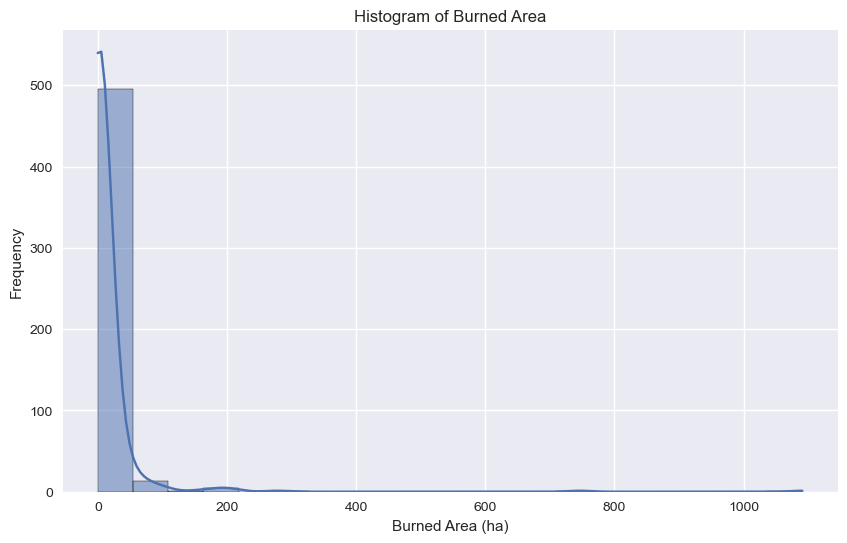

In [7]:
# Distribution Visualization
plt.figure(figsize=(10, 6))

# Histogram
sns.histplot(data['area'], kde=True, bins=20)
plt.title('Histogram of Burned Area')
plt.xlabel('Burned Area (ha)')
plt.ylabel('Frequency')
plt.show()

The plot is heavily skewed and mostly useless, due to the large number of small areas burned and the several outliers around 700 and 1,000 $ha$. A better way to plot the data would be using the log scale.

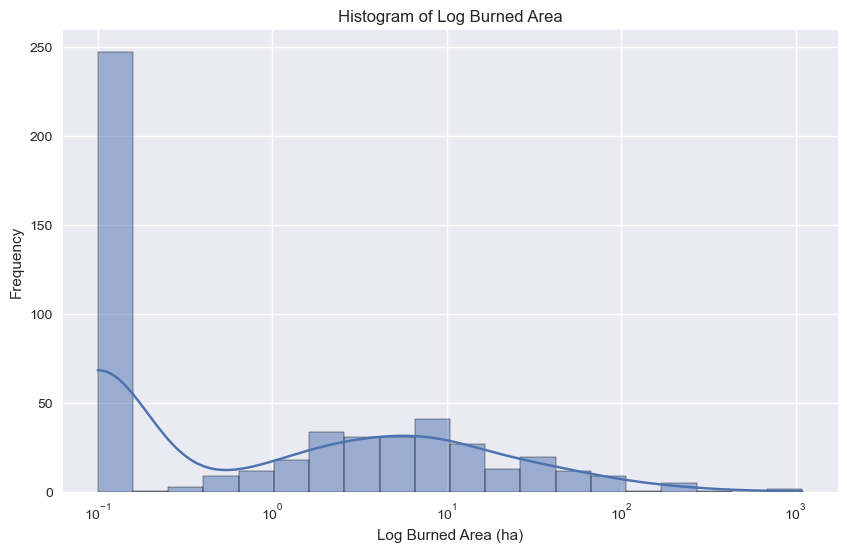

In [8]:
# Distribution Visualization
plt.figure(figsize=(10, 6))

# Histogram
# Adding 0.1 to the values in 'data', to allow plotting observations where area=0
sns.histplot(data['area'] + 0.1, kde=True, bins=20, log_scale=True)
plt.title('Histogram of Log Burned Area')
plt.xlabel('Log Burned Area (ha)')
plt.ylabel('Frequency')
plt.show()

That's better. Other than where the `area` equals 0, the data produces a bell-shaped distribution that's slightly skewed to the right. Let's create a new column titled `log_area` to use as the outcome from now on:

In [9]:
data['log_area'] = np.log(data['area'] + 0.1)
data['log_area'].describe()

count    517.000000
mean      -0.115435
std        2.350162
min       -2.302585
25%       -2.302585
50%       -0.478036
75%        1.897620
max        6.994795
Name: log_area, dtype: float64

### Categorical Features <a name="categorical_features"></a>

`month` and `day` are cateogrical features. To allow their data be used in the `scikit-learn` models, I'll need to make numerical features out of them. Let's take a closer look at each of them.

In [10]:
def fire_statistics(df, grouping_col, order):
    """
    Create a summary table of fire statistics by grouping
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame with feature columns and 'area' as target
    grouping_col : str
        Column to group by
    
    Returns:
    --------
    pandas.DataFrame
        Summary statistics table
    """
    # Create summary
    stats = df.groupby(grouping_col).agg({
        'area': ['count', 'mean', 'sum']
    }).round(2)
    
    # Flatten column names
    stats.columns = ['Number of Fires', 'Mean Area Burned', 'Total Area Burned']
    
    # Reorder based on temporal sequence
    stats = stats.reindex(order)
    
    # Add percentage of total fires
    stats['Percentage of Fires'] = (stats['Number of Fires'] / 
                                  stats['Number of Fires'].sum() * 100).round(2)

    stats['Percentage of Area Burned'] = (stats['Total Area Burned'] / stats['Total Area Burned'].sum() * 100).round(2)
    
    return stats

#### month <a name="month_cleaning"></a>


Monthly Fire Statistics:
------------------------------------------------------------


,Number of Fires,Mean Area Burned,Total Area Burned,Percentage of Fires,Percentage of Area Burned
month,,,,,
jan,2,0.00,0.00,0.39,0.00
feb,20,6.28,125.50,3.87,1.89
mar,54,4.36,235.26,10.44,3.54
apr,9,8.89,80.02,1.74,1.20
may,2,19.24,38.48,0.39,0.58
jun,17,5.84,99.30,3.29,1.50
jul,32,14.37,459.83,6.19,6.92
aug,184,12.49,2297.99,35.59,34.60
sep,172,17.94,3086.13,33.27,46.46


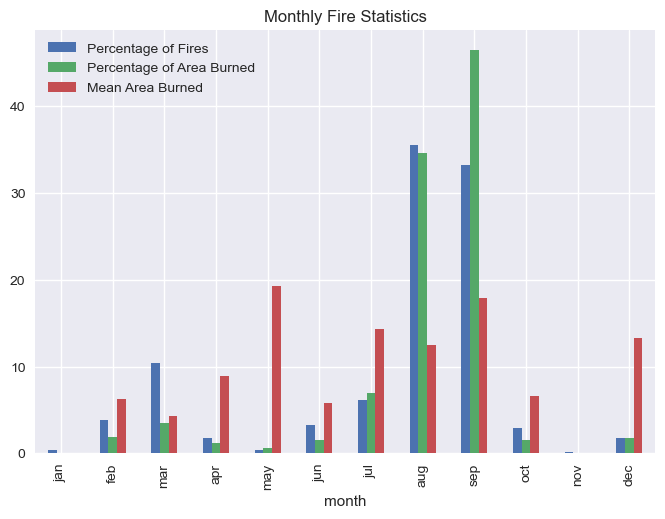

In [11]:
# Set a custom order to display the months by
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
                'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Generate the statistics
monthly_summary = fire_statistics(data, 'month', month_order)
print("\nMonthly Fire Statistics:")
print("-" * 60)
display(monthly_summary)

monthly_summary.plot.bar(y=['Percentage of Fires', 'Percentage of Area Burned', 'Mean Area Burned'])
plt.title("Monthly Fire Statistics")
plt.show()

The data above shows that the fire pattern changes throughout the year. I'll divide the data into 3 periods, based on the fires pattern:
* Peak fire period: August-September (356 fires, ~69% of total). This clear peak suggests a strong seasonal driver (possibly late summer conditions)
* Secondary activity: March-July (114 fires, ~22% of total). This period shows more complex patterns, suggesting multiple factors affecting fire occurrence and size
* Low activity: October-February (47 fires, ~9% of total). Pattern suggests occasional fires during unfavorable conditions

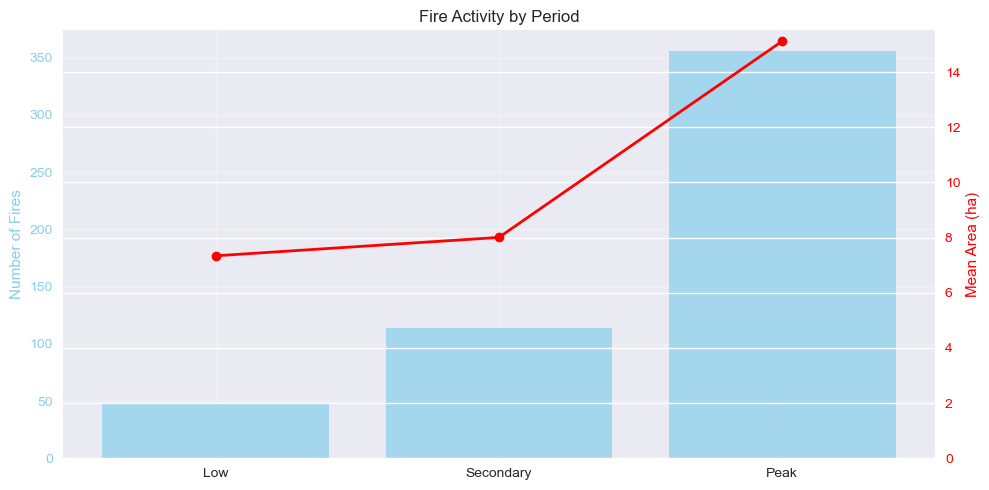

In [12]:
# Add period column to data
data['period'] = 'Low'
data.loc[data['month'].isin(['mar', 'apr', 'may', 'jun', 'jul']), 'period'] = 'Secondary'
data.loc[data['month'].isin(['aug', 'sep']), 'period'] = 'Peak'

# Add period column to monthly_summary, to plot the data
monthly_summary['period'] = 'Low'
monthly_summary.loc[monthly_summary.index.isin(['mar', 'apr', 'may', 'jun', 'jul']), 'period'] = 'Secondary'
monthly_summary.loc[monthly_summary.index.isin(['aug', 'sep']), 'period'] = 'Peak'

# Calculate period aggregates
period_data = monthly_summary.groupby('period').agg({
    'Number of Fires': 'sum',
    'Total Area Burned': 'sum'
}).reset_index().sort_values('Number of Fires')
period_data['Mean Area Burned'] = period_data['Total Area Burned'] / period_data['Number of Fires']

# Create figure with two subplots
fig, ax = plt.subplots(figsize=(10, 5))

# Plot 1: Fire Activity by Period
ax_twin = ax.twinx()

# Plot bars for number of fires
bars = ax.bar(period_data['period'], period_data['Number of Fires'], color='skyblue', alpha=0.7)
ax.set_ylabel('Number of Fires', color='skyblue')
ax.tick_params(axis='y', labelcolor='skyblue')

# Plot line for mean area
line = ax_twin.plot(period_data['period'], period_data['Mean Area Burned'], color='red', marker='o', linewidth=2, label='Mean Area')
ax_twin.set_ylabel('Mean Area (ha)', color='red')
ax_twin.tick_params(axis='y', labelcolor='red')
ax_twin.set_ylim(ymin=0)

# Add title and adjust layout
ax.set_title('Fire Activity by Period')
ax.grid(True, alpha=0.3)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

#### day <a name="day_cleaning"></a>


Daily Fire Statistics:
------------------------------------------------------------


,Number of Fires,Mean Area Burned,Total Area Burned,Percentage of Fires,Percentage of Area Burned
day,,,,,
mon,74,9.55,706.53,14.31,10.64
tue,64,12.62,807.79,12.38,12.16
wed,54,10.71,578.60,10.44,8.71
thu,61,16.35,997.10,11.80,15.01
fri,85,5.26,447.24,16.44,6.73
sat,84,25.53,2144.86,16.25,32.29
sun,95,10.10,959.93,18.38,14.45


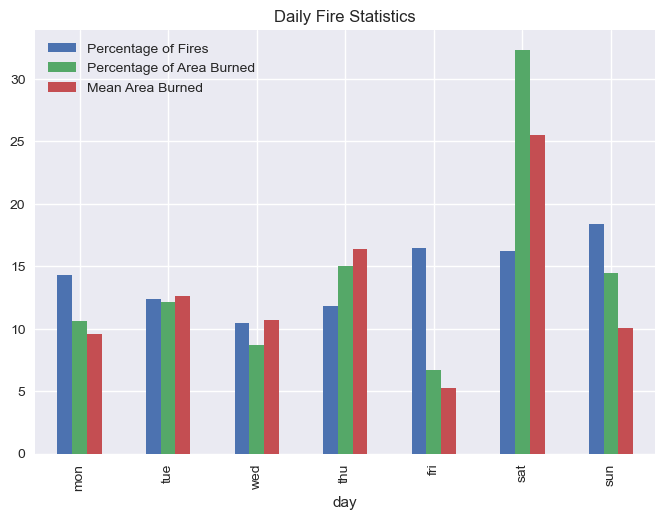

In [13]:
# Set a custom order to display the days by
day_order = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']

# Generate the statistics
daily_summary = fire_statistics(data, 'day', day_order)
print("\nDaily Fire Statistics:")
print("-" * 60)
display(daily_summary)

daily_summary.plot.bar(y=['Percentage of Fires', 'Percentage of Area Burned', 'Mean Area Burned'])

plt.title("Daily Fire Statistics")
plt.show()

The daily data suggests that there's a clear weekend effect with both frequency and size (34.63% of all fires and 46.74% of area burned).

The pattern suggests potential human activity influence:

* More fires on days when people are off work
* Larger fires on Saturdays might indicate delayed detection/response

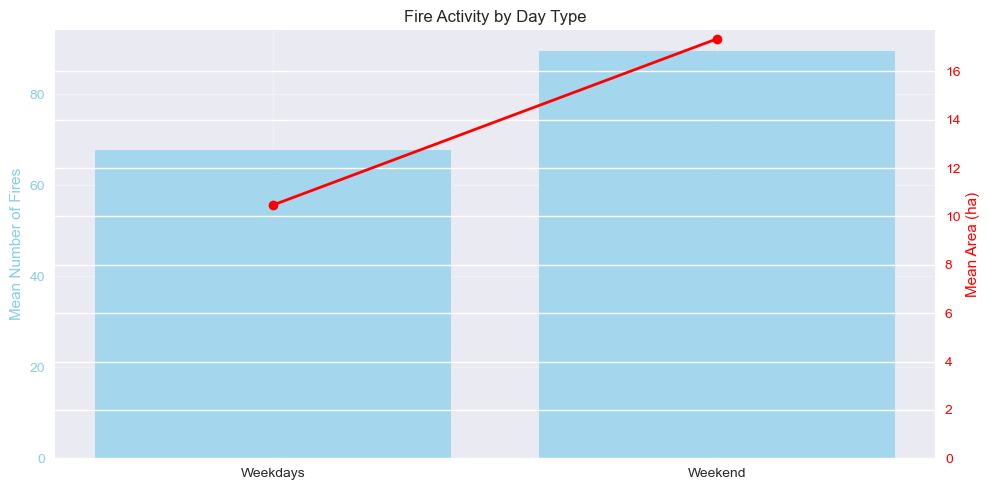

In [14]:
# Add period column to data
data['weekend'] = data['day'].isin(['sat', 'sun']).astype('int64')

# Add period column to daily_summary, to plot the data
daily_summary['weekend'] = daily_summary.index.isin(['sat', 'sun']).astype('int64')

# Calculate day type aggregates
day_type_data = daily_summary.groupby('weekend').agg({
    'Number of Fires': 'sum',
    'Total Area Burned': 'sum'
}).reset_index().sort_values('Number of Fires')
day_type_data['Mean Area Burned'] = day_type_data['Total Area Burned'] / day_type_data['Number of Fires']
day_type_data['Mean Number of Fires'] = day_type_data['Number of Fires'] / (5 - 3 * day_type_data['weekend'])

# Create figure with two subplots
fig, ax = plt.subplots(figsize=(10, 5))

# Plot 1: Fire Activity by day type
ax_twin = ax.twinx()

# Plot bars for number of fires
bars = ax.bar(day_type_data['weekend'], day_type_data['Mean Number of Fires'], color='skyblue', alpha=0.7)
ax.set_ylabel('Mean Number of Fires', color='skyblue')
ax.tick_params(axis='y', labelcolor='skyblue')
ax.set_xticks([0, 1], ['Weekdays', 'Weekend'])

# Plot line for mean area
line = ax_twin.plot(day_type_data['weekend'], day_type_data['Mean Area Burned'], color='red', marker='o', linewidth=2, label='Mean Area')
ax_twin.set_ylabel('Mean Area (ha)', color='red')
ax_twin.tick_params(axis='y', labelcolor='red')
ax_twin.set_ylim(ymin=0)

# Add title and adjust layout
ax.set_title('Fire Activity by Day Type')
ax.grid(True, alpha=0.3)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

#### Generating Dummies <a name="generating_dummies"></a>

Now that I've identified the fire profiles by time, I can generate dummy data to use in my models. There's no need to generate dummies for `weekend` since it's already a boolean column, so I only need to generate them for `period`.\
I'll also take the opportuniy to remove the `day` and `month` columns, since they're no longer needed, as I have the data I need in the `weekend` and `period` columns.

In [15]:
data_dummies = pd.get_dummies(data, columns=['period'], dtype='int64')\
                 .drop(['month', 'day'], axis=1)

### Dealing with Missing Data <a name="dealing_with_missing_data"></a>

As mentioned above, 8 of the features have missing data. Let's look at all the rows with missing data:

In [16]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    display(data_dummies[data_dummies.isna().any(axis=1)])

,Unnamed: 0,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,log_area,weekend,period_Low,period_Peak,period_Secondary
0,1,7,5,86.2,26.2,94.3,5.1,NaN,51.0,6.7,0.0,0.00,-2.303,0,0,0,1
1,2,7,4,90.6,NaN,669.1,6.7,18.0,33.0,0.9,0.0,0.00,-2.303,0,1,0,0
2,3,7,4,90.6,43.7,NaN,6.7,14.6,33.0,1.3,0.0,0.00,-2.303,1,1,0,0
4,5,8,6,89.3,51.3,102.2,9.6,11.4,99.0,NaN,0.0,0.00,-2.303,1,0,0,1
12,13,6,5,63.5,70.8,665.3,0.8,17.0,72.0,6.7,NaN,0.00,-2.303,0,0,1,0
14,15,6,5,92.9,133.3,NaN,9.2,26.4,21.0,4.5,0.0,0.00,-2.303,0,0,1,0
16,17,5,5,91.7,35.8,80.8,7.8,15.1,NaN,5.4,0.0,0.00,-2.303,1,0,0,1
17,18,8,5,84.9,32.8,NaN,3.0,16.7,47.0,4.9,NaN,0.00,-2.303,0,1,0,0
18,19,6,4,89.2,NaN,70.8,6.3,15.9,35.0,4.0,0.0,0.00,-2.303,0,0,0,1
20,21,6,4,91.0,129.5,692.6,7.0,18.3,40.0,2.7,NaN,0.00,-2.303,0,0,1,0


The missing data is spread rather arbitrarily, and there's no apparent pattern to it (e.g., only on specific days or months, or a tendency to clump missing data together).
So, to allow these features to be used in the model I'll impute any missing data from the existing data.

To do that I'll use a K-Nearest Neighbours imputer, which estimates missing values in a dataset by considering the values of the closest data points, since I assume that fires with similar characteristics behave similarly.

In [17]:
# Setting weight by distance, so that nearer neighbours will have a greater effect on the imputed value 
imputer = KNNImputer(weights='distance')

imputed_data = pd.DataFrame(imputer.fit_transform(data_dummies), columns=data_dummies.columns)

In [18]:
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        517 non-null    float64
 1   X                 517 non-null    float64
 2   Y                 517 non-null    float64
 3   FFMC              517 non-null    float64
 4   DMC               517 non-null    float64
 5   DC                517 non-null    float64
 6   ISI               517 non-null    float64
 7   temp              517 non-null    float64
 8   RH                517 non-null    float64
 9   wind              517 non-null    float64
 10  rain              517 non-null    float64
 11  area              517 non-null    float64
 12  log_area          517 non-null    float64
 13  weekend           517 non-null    float64
 14  period_Low        517 non-null    float64
 15  period_Peak       517 non-null    float64
 16  period_Secondary  517 non-null    float64
dt

In [19]:
imputed_data.describe()

,Unnamed: 0,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,log_area,weekend,period_Low,period_Peak,period_Secondary
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,259.000000,4.669246,4.299807,90.584974,111.172991,547.606469,9.023821,18.874794,44.371447,4.021543,0.021663,12.847292,-0.115435,0.346228,0.090909,0.688588,0.220503
std,149.389312,2.313778,1.229900,5.575487,63.798635,244.806764,4.558950,5.752430,15.824282,1.762791,0.295959,63.655818,2.350162,0.476228,0.287758,0.463519,0.414987
min,1.000000,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,-2.302585,0.000000,0.000000,0.000000,0.000000
25%,130.000000,3.000000,4.000000,90.200000,69.801221,431.600000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,-2.302585,0.000000,0.000000,0.000000,0.000000
50%,259.000000,4.000000,4.000000,91.600000,108.300000,661.300000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,-0.478036,0.000000,0.000000,1.000000,0.000000
75%,388.000000,7.000000,5.000000,92.800000,142.400000,709.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,1.897620,1.000000,0.000000,1.000000,0.000000
max,517.000000,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,6.994795,1.000000,1.000000,1.000000,1.000000


### Detecting Outliers <a name="detecting_outliers"></a>

Outliers can skew the results of our model. To find outliers, I'll look at histograms and boxplots of the numerical data:

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_histograms(df, features):
    """
    Create a grid of histograms for specified features
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame
    features : list
        List of column names to plot
    """
    # Calculate grid dimensions
    n_features = len(features)
    n_cols = 4
    n_rows = (n_features + n_cols - 1) // n_cols
    
    # Create figure with subplots
    plt.figure(figsize=(16, 4 * n_rows))
    
    # Plot histograms for each feature
    for i, feature in enumerate(features, 1):
        plt.subplot(n_rows, n_cols, i)
        
        # Check for missing values
        feature_data = df[feature].dropna()
        
        # Create the histogram
        sns.histplot(feature_data)
        
        # Set title and labels
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()

In [21]:
def plot_selected_boxplots(df, features):
    """
    Create a boxplot for specified features using long-form data
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame
    features : list
        List of column names to plot
    """
    # Prepare long-form data for boxplot
    df_long = df[features].melt(var_name='Feature', value_name='Value')
    
    # Create the figure and boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Feature', y='Value', data=df_long)
    
    # Customize the plot
    plt.title('Boxplots of Meteorological Features', fontsize=15)
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

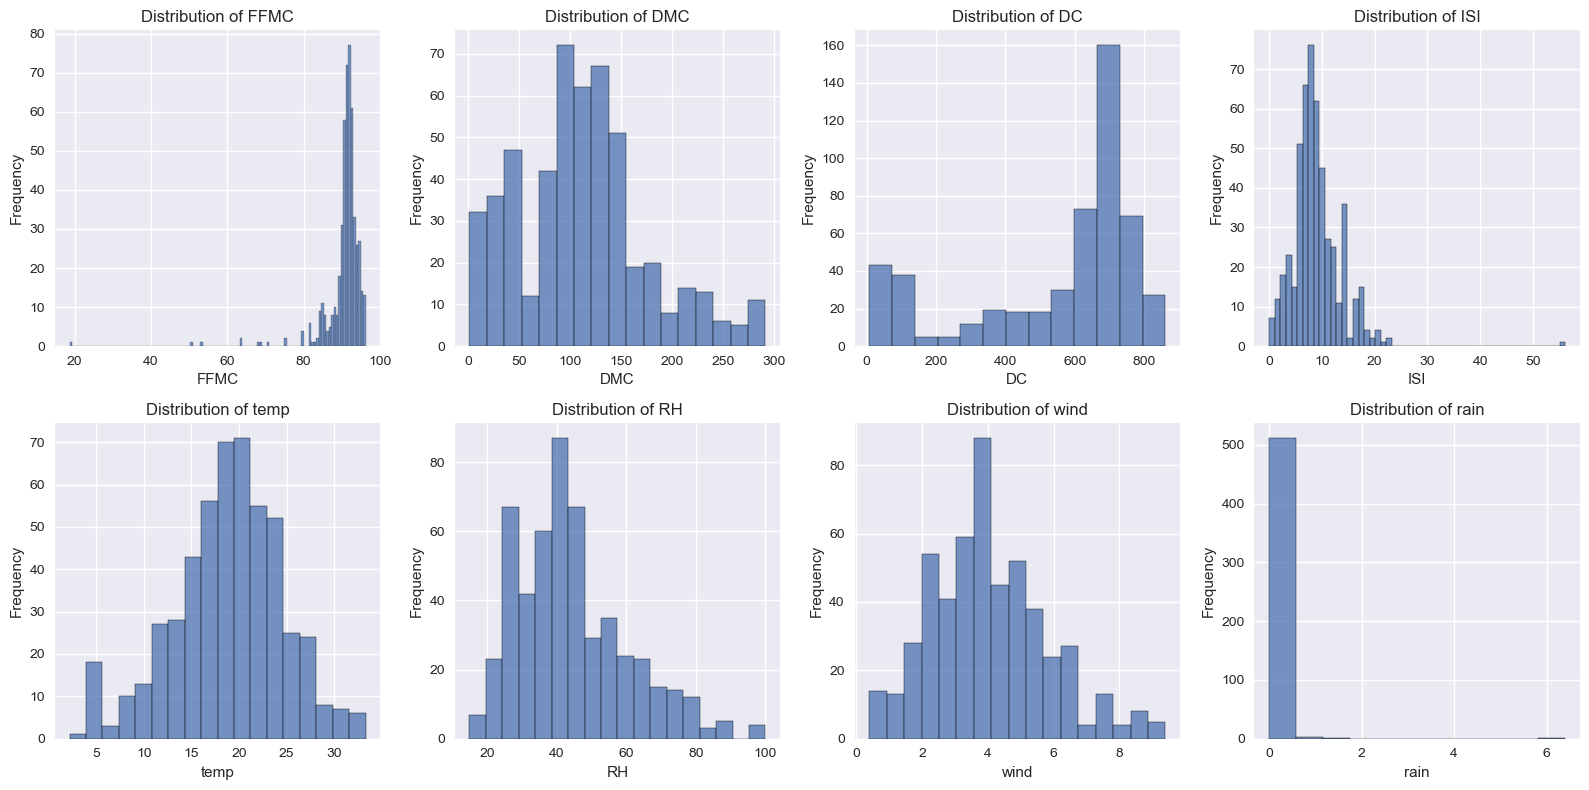

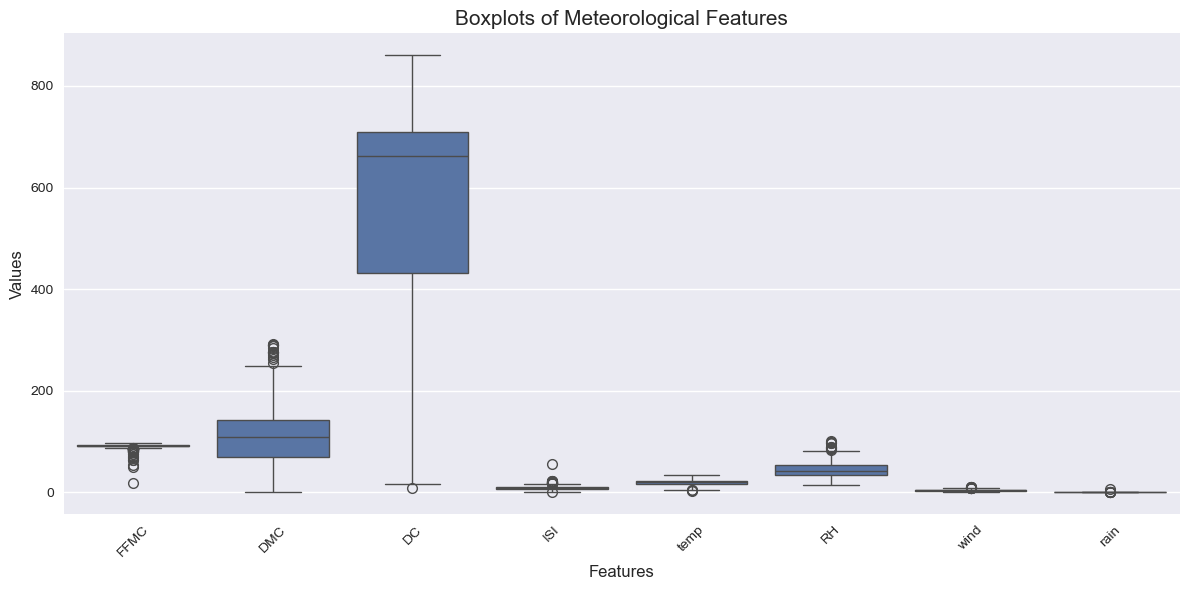

In [22]:
# List of features to plot
features_to_plot = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

# Plot the histograms
plot_feature_histograms(imputed_data, features_to_plot)

# Plot the boxplots
plot_selected_boxplots(imputed_data, features_to_plot)

While the box plot suggests several outliers in each of the columns, the histograms only show 3 features with potential outliers: `FFMC`, `ISI` and `rain`.\
I want to take a closer look into each of them, so I'll start by writing a function to detect the outliers:

In [23]:
def detect_outliers(series):
    """
    Detect outliers in a series using IQR and Z-Score methods
    
    Parameters:
    -----------
    series : pandas.Series
        Input series to analyze
    
    Returns:
    --------
    dict: Dictionary containing outliers detected by each method
    """
    # 1. IQR Method
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    # Outliers are points that are 1.5 IQR above Q3 or below Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    iqr_outliers = series[(series < lower_bound) | (series > upper_bound)]
    
    # 2. Z-Score Method
    z_scores = np.abs(stats.zscore(series))
    # Outliers are points with Z-Score over 3
    z_score_outliers = series[z_scores > 3]
    
    # Print Results
    print(f"Outlier Detection Results for {series.name}:")
    print("-" * 40)
    print(f"Total observations: {len(series)}")
    print(f"IQR Method Outliers: {len(iqr_outliers)} ({len(iqr_outliers)/len(series)*100:.2f}%)")
    print(f"Z-Score Outliers: {len(z_score_outliers)} ({len(z_score_outliers)/len(series)*100:.2f}%)")
    
    # Visualization
    plt.figure(figsize=(12, 5))
    
    # Distribution with IQR bounds
    plt.subplot(1, 2, 1)
    sns.histplot(series, kde=True)
    plt.axvline(lower_bound, color='r', linestyle='--', label='IQR Bounds')
    plt.axvline(upper_bound, color='r', linestyle='--')
    plt.title(f'Distribution of {series.name} with IQR Bounds')
    plt.xlabel(series.name)
    plt.legend()
    
    # Values vs Z-scores
    plt.subplot(1, 2, 2)
    plt.scatter(series, z_scores)
    plt.axhline(y=3, color='r', linestyle='--', label='Z-Score Threshold')
    plt.title('Values vs Z-Scores')
    plt.xlabel(series.name)
    plt.ylabel('Z-Score')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Return outliers from different methods
    return {
        'iqr_outliers': iqr_outliers,
        'z_score_outliers': z_score_outliers
    }

#### FFMC <a name="ffmc_outliers"></a>

Outlier Detection Results for FFMC:
----------------------------------------
Total observations: 517
IQR Method Outliers: 56 (10.83%)
Z-Score Outliers: 8 (1.55%)


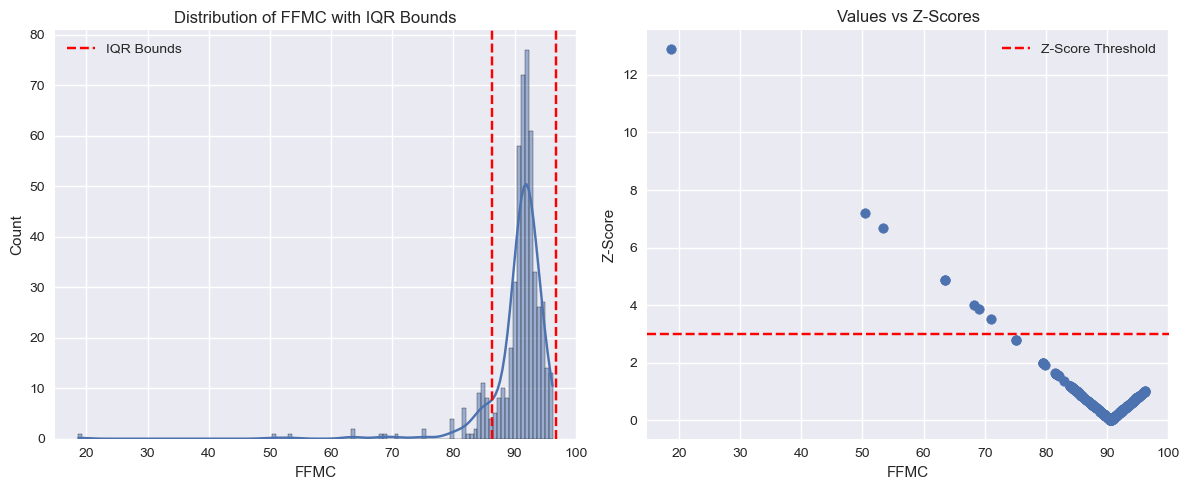

In [24]:
ffmc_outliers = detect_outliers(imputed_data['FFMC'])

The IQR method detected too many outliers, but using the z-score as our threshold gives us 8 points that are significantly remote from the bulk of the data and can be removed.

In [25]:
ffmc_outliers_to_remove = list(ffmc_outliers['z_score_outliers'].index)

#### ISI <a name="isi_outliers"></a>

Outlier Detection Results for ISI:
----------------------------------------
Total observations: 517
IQR Method Outliers: 23 (4.45%)
Z-Score Outliers: 2 (0.39%)


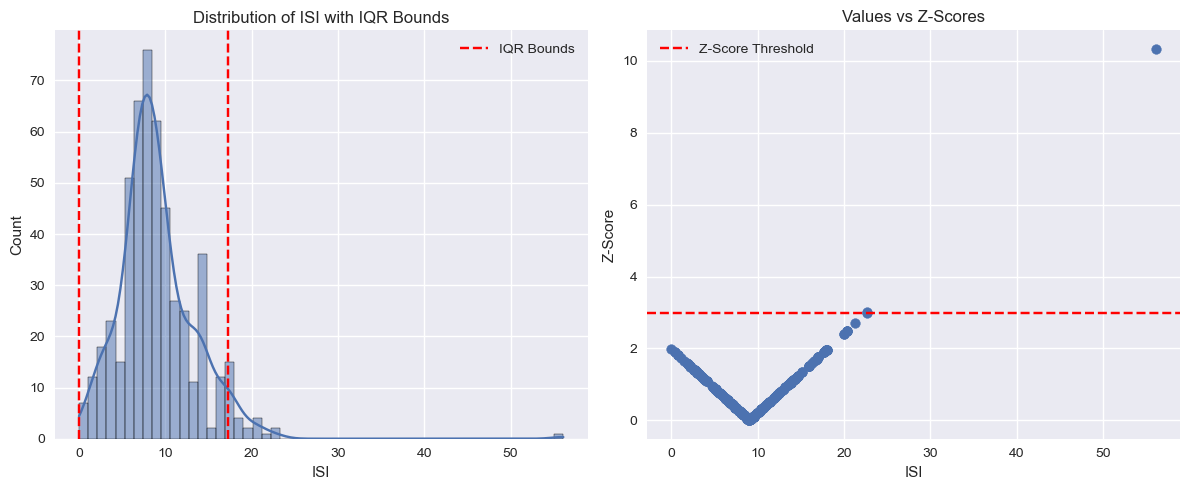

In [26]:
isi_outliers = detect_outliers(imputed_data['ISI'])

In [27]:
isi_outliers['z_score_outliers']

22     56.1
266    22.7
Name: ISI, dtype: float64

Again, the Z-score method is better at identifying a cut-off between the main body of the data and outliers. I'll only remove the first outlier, which is very remote from all the other data points.

In [28]:
isi_outliers_to_remove = [isi_outliers['z_score_outliers'].index[0]]

#### Rain <a name="rain_outliers"></a>

Outlier Detection Results for rain:
----------------------------------------
Total observations: 517
IQR Method Outliers: 8 (1.55%)
Z-Score Outliers: 3 (0.58%)


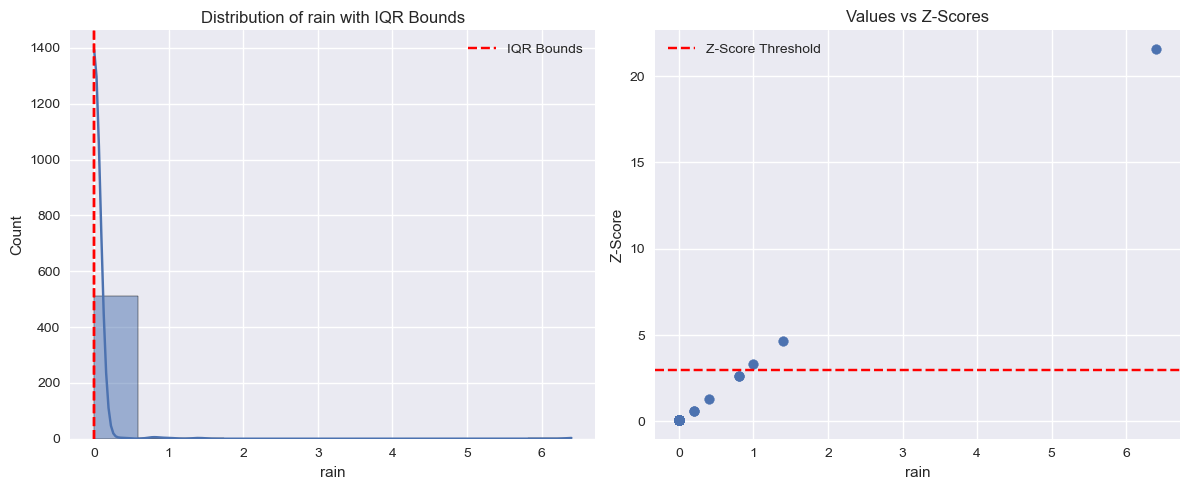

In [29]:
rain_outliers = detect_outliers(imputed_data['rain'])

In [30]:
imputed_data['rain'].value_counts()

rain
0.0    509
0.2      2
0.8      2
1.0      1
6.4      1
0.4      1
1.4      1
Name: count, dtype: int64

In [31]:
rain_outliers['z_score_outliers']

243    1.0
499    6.4
509    1.4
Name: rain, dtype: float64

Because the vast majority of days didn't have any rain, the IQR method treats any non-zero observation as an outlier. the Z-score method performs better. As above, I'll remove only the last outlier, because it's extremely remote and unlikely.

In [32]:
rain_outliers_to_remove = [rain_outliers['z_score_outliers'].index[1]]

### Removing Outliers <a name="removing_outliers"></a>

Before removing the outliers I want to look at the observations with the outliers and see if I can find a reason not to remove them.

In [33]:
outliers_to_remove = sorted(ffmc_outliers_to_remove + isi_outliers_to_remove + rain_outliers_to_remove)
outliers_to_remove

[12, 22, 97, 130, 199, 299, 304, 312, 379, 499]

In [34]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    display(imputed_data.iloc[outliers_to_remove])

,Unnamed: 0,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,log_area,weekend,period_Low,period_Peak,period_Secondary
12,13.0,6.0,5.0,63.500,70.8,665.300,0.8,17.0,72.000,6.7,0.0,0.00,-2.303,0.0,0.0,1.0,0.0
22,23.0,7.0,4.0,94.300,96.3,200.000,56.1,21.0,44.000,4.5,0.0,0.00,-2.303,1.0,0.0,0.0,1.0
97,98.0,3.0,4.0,69.000,2.4,15.500,0.7,17.4,24.000,5.4,0.0,0.00,-2.303,1.0,0.0,0.0,1.0
130,131.0,4.0,6.0,68.200,21.5,87.200,0.8,15.4,40.000,2.7,0.0,0.00,-2.303,1.0,1.0,0.0,0.0
199,200.0,2.0,4.0,63.500,70.8,665.300,0.8,22.6,38.000,3.6,0.0,11.32,2.435,0.0,0.0,1.0,0.0
299,300.0,6.0,5.0,53.400,71.0,233.800,0.4,10.6,90.000,2.7,0.0,0.00,-2.303,1.0,0.0,0.0,1.0
304,305.0,6.0,5.0,71.007,28.0,113.800,3.5,11.3,62.705,4.9,0.0,0.00,-2.303,1.0,0.0,0.0,1.0
312,313.0,2.0,4.0,50.400,46.2,341.636,0.4,12.2,78.000,6.3,0.0,0.00,-2.303,1.0,0.0,1.0,0.0
379,380.0,4.0,5.0,18.700,1.1,171.400,0.0,5.2,100.000,0.9,0.0,0.00,-2.303,1.0,1.0,0.0,0.0
499,500.0,7.0,5.0,96.113,181.1,671.200,14.3,27.3,63.000,4.9,6.4,10.82,2.391,0.0,0.0,1.0,0.0


There's no apparent pattern to the outliers, so it seems like it's safe to remove them.

In [35]:
cleaned_data = imputed_data.drop(outliers_to_remove)

### Dropping Features <a name="dropping_features"></a>

All the features in the dataset may prove to be useful as predictors, so I'll only remove one column - `Unnamed: 0`, which, as mentioned above, is redundant since it's simply an index.

In [36]:
cleaned_data.drop('Unnamed: 0', axis=1, inplace=True)

### Standardizing the Data <a name="standardizing_the_data"></a>

To simplify the usage of the `scikit-learn` models I'll standardize all the non-boolean columns to a mean of 0 and standard deviation of 1:

In [37]:
columns_to_scale = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
scaler = StandardScaler()
scaled_cleaned_data = scaler.fit_transform(cleaned_data[columns_to_scale])
scaled_cleaned_data = pd.DataFrame(scaled_cleaned_data, columns = columns_to_scale, index=cleaned_data.index)
scaled_cleaned_data

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,1.004997,0.572791,-1.576826,-1.353641,-1.889076,-0.997259,-0.839042,0.450658,1.522833,-0.101231
1,1.004997,-0.236137,-0.158966,-0.713965,0.482457,-0.593138,-0.162750,-0.714854,-1.768968,-0.101231
2,1.004997,-0.236137,-0.158966,-1.078203,-0.532707,-0.593138,-0.756792,-0.714854,-1.541947,-0.101231
3,1.436075,1.381720,0.195499,-1.241892,-1.958391,-0.012213,-1.857519,3.429186,-0.009557,2.037268
4,1.436075,1.381720,-0.577879,-0.958584,-1.856482,0.139332,-1.315891,3.558688,0.562604,-0.101231
...,...,...,...,...,...,...,...,...,...,...
512,-0.288235,-1.045065,-3.059133,-0.873591,0.468017,-1.805502,1.549492,-0.779604,-0.747375,-0.101231
513,-1.150390,-0.236137,-3.059133,-0.873591,0.468017,-1.805502,0.518653,1.745670,1.012036,-0.101231
514,1.004997,-0.236137,-3.059133,-0.873591,0.468017,-1.805502,0.396350,1.680919,1.522833,-0.101231
515,-1.581468,-0.236137,1.065549,0.531933,0.258012,0.568711,1.165111,-0.132098,-0.009557,-0.101231


In [38]:
final_data = scaled_cleaned_data.join(cleaned_data.iloc[:, 10:])

In [39]:
final_data

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,log_area,weekend,period_Low,period_Peak,period_Secondary
0,1.004997,0.572791,-1.576826,-1.353641,-1.889076,-0.997259,-0.839042,0.450658,1.522833,-0.101231,0.00,-2.302585,0.0,0.0,0.0,1.0
1,1.004997,-0.236137,-0.158966,-0.713965,0.482457,-0.593138,-0.162750,-0.714854,-1.768968,-0.101231,0.00,-2.302585,0.0,1.0,0.0,0.0
2,1.004997,-0.236137,-0.158966,-1.078203,-0.532707,-0.593138,-0.756792,-0.714854,-1.541947,-0.101231,0.00,-2.302585,1.0,1.0,0.0,0.0
3,1.436075,1.381720,0.195499,-1.241892,-1.958391,-0.012213,-1.857519,3.429186,-0.009557,2.037268,0.00,-2.302585,0.0,0.0,0.0,1.0
4,1.436075,1.381720,-0.577879,-0.958584,-1.856482,0.139332,-1.315891,3.558688,0.562604,-0.101231,0.00,-2.302585,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-0.288235,-1.045065,-3.059133,-0.873591,0.468017,-1.805502,1.549492,-0.779604,-0.747375,-0.101231,6.44,1.877937,1.0,0.0,1.0,0.0
513,-1.150390,-0.236137,-3.059133,-0.873591,0.468017,-1.805502,0.518653,1.745670,1.012036,-0.101231,54.29,3.996180,1.0,0.0,1.0,0.0
514,1.004997,-0.236137,-3.059133,-0.873591,0.468017,-1.805502,0.396350,1.680919,1.522833,-0.101231,11.16,2.421257,1.0,0.0,1.0,0.0
515,-1.581468,-0.236137,1.065549,0.531933,0.258012,0.568711,1.165111,-0.132098,-0.009557,-0.101231,0.00,-2.302585,1.0,0.0,1.0,0.0


Let's take a final look at the features, now that they're clean and scaled:

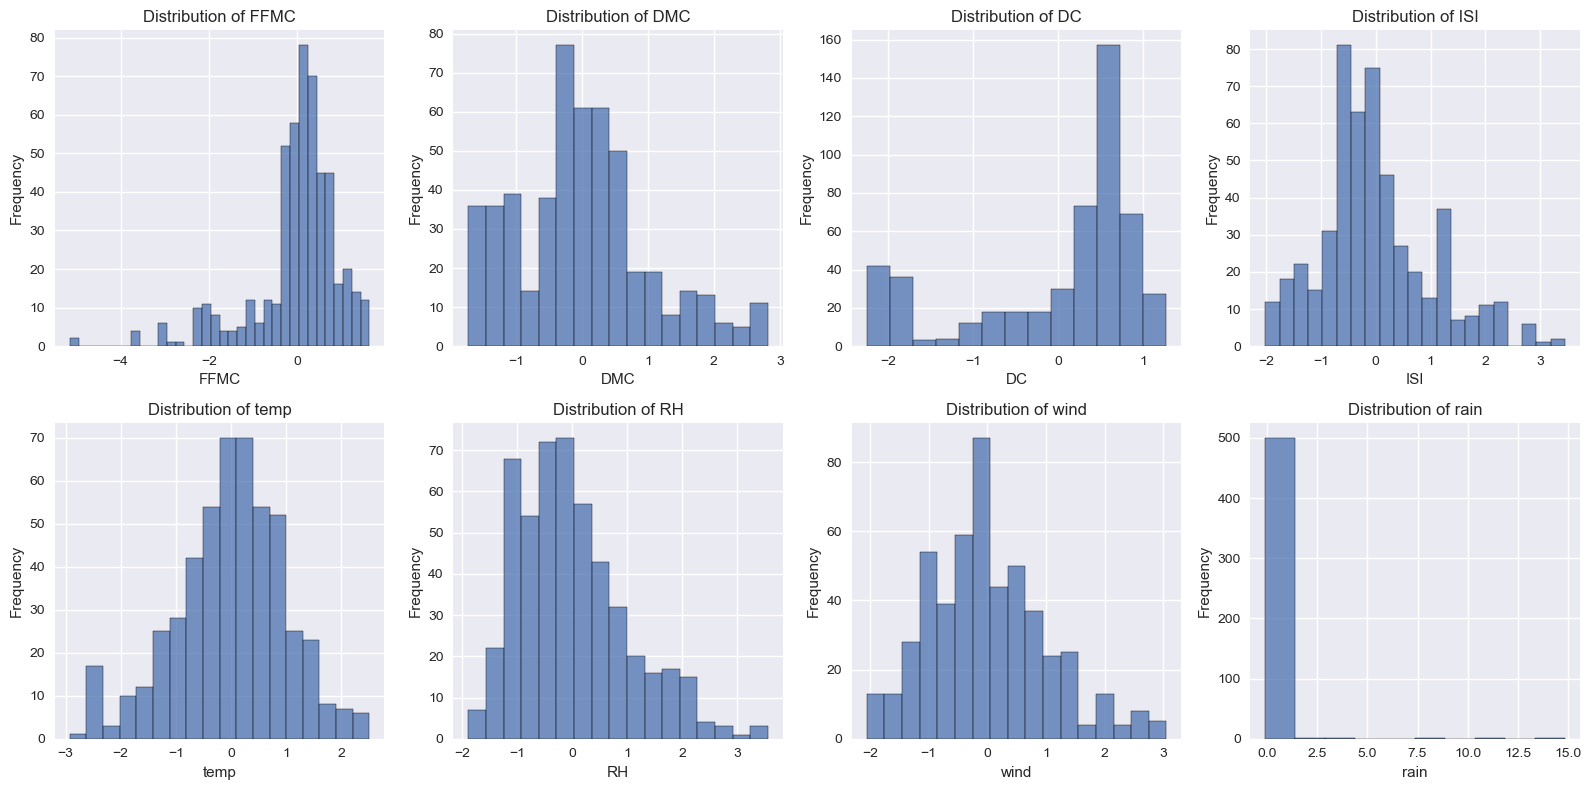

In [40]:
# Plot the histograms
plot_feature_histograms(final_data, features_to_plot)

In [41]:
def analyze_feature_relationships(df, features, target):
    """
    Analyze and visualize relationships between features and target variable
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame
    features : list
        List of feature names to analyze
    target : str
        Name of target variable
    """
    # Calculate number of rows needed for subplots
    n_features = len(features)
    n_cols = 4
    n_rows = (n_features + n_cols - 1) // n_cols
    
    # Create figure
    plt.figure(figsize=(20, 5 * n_rows))
    
    # Store correlation results
    correlations = []
    
    # Create plots for each feature
    for idx, feature in enumerate(features, 1):
        x = df[feature]
        y = df[target]
        
        # Calculate correlations
        pearson_corr, pearson_p = stats.pearsonr(x, y)
        spearman_corr, spearman_p = stats.spearmanr(x, y)
        
        # Store results
        correlations.append({
            'Feature': feature,
            'Pearson Correlation': pearson_corr,
            'Pearson P-value': pearson_p,
            'Spearman Correlation': spearman_corr,
            'Spearman P-value': spearman_p
        })
        
        # Create subplot
        plt.subplot(n_rows, n_cols, idx)
        
        # Create scatter plot with regression line
        sns.regplot(x=x, y=y, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
        
        # Add title and labels
        plt.title(f'{feature} vs {target}\n' + 
                 f'Pearson r: {pearson_corr:.3f} (p={pearson_p:.3f})\n' +
                 f'Spearman ρ: {spearman_corr:.3f} (p={spearman_p:.3f})')
        plt.xlabel(feature)
        plt.ylabel(target)
        
        # Add grid
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Create correlation summary DataFrame
    corr_df = pd.DataFrame(correlations)
    corr_df = corr_df.round(4)
    
    # Sort by absolute Pearson correlation
    corr_df['Abs_Pearson'] = abs(corr_df['Pearson Correlation'])
    corr_df = corr_df.sort_values('Abs_Pearson', ascending=False)
    corr_df = corr_df.drop('Abs_Pearson', axis=1)
    
    return corr_df

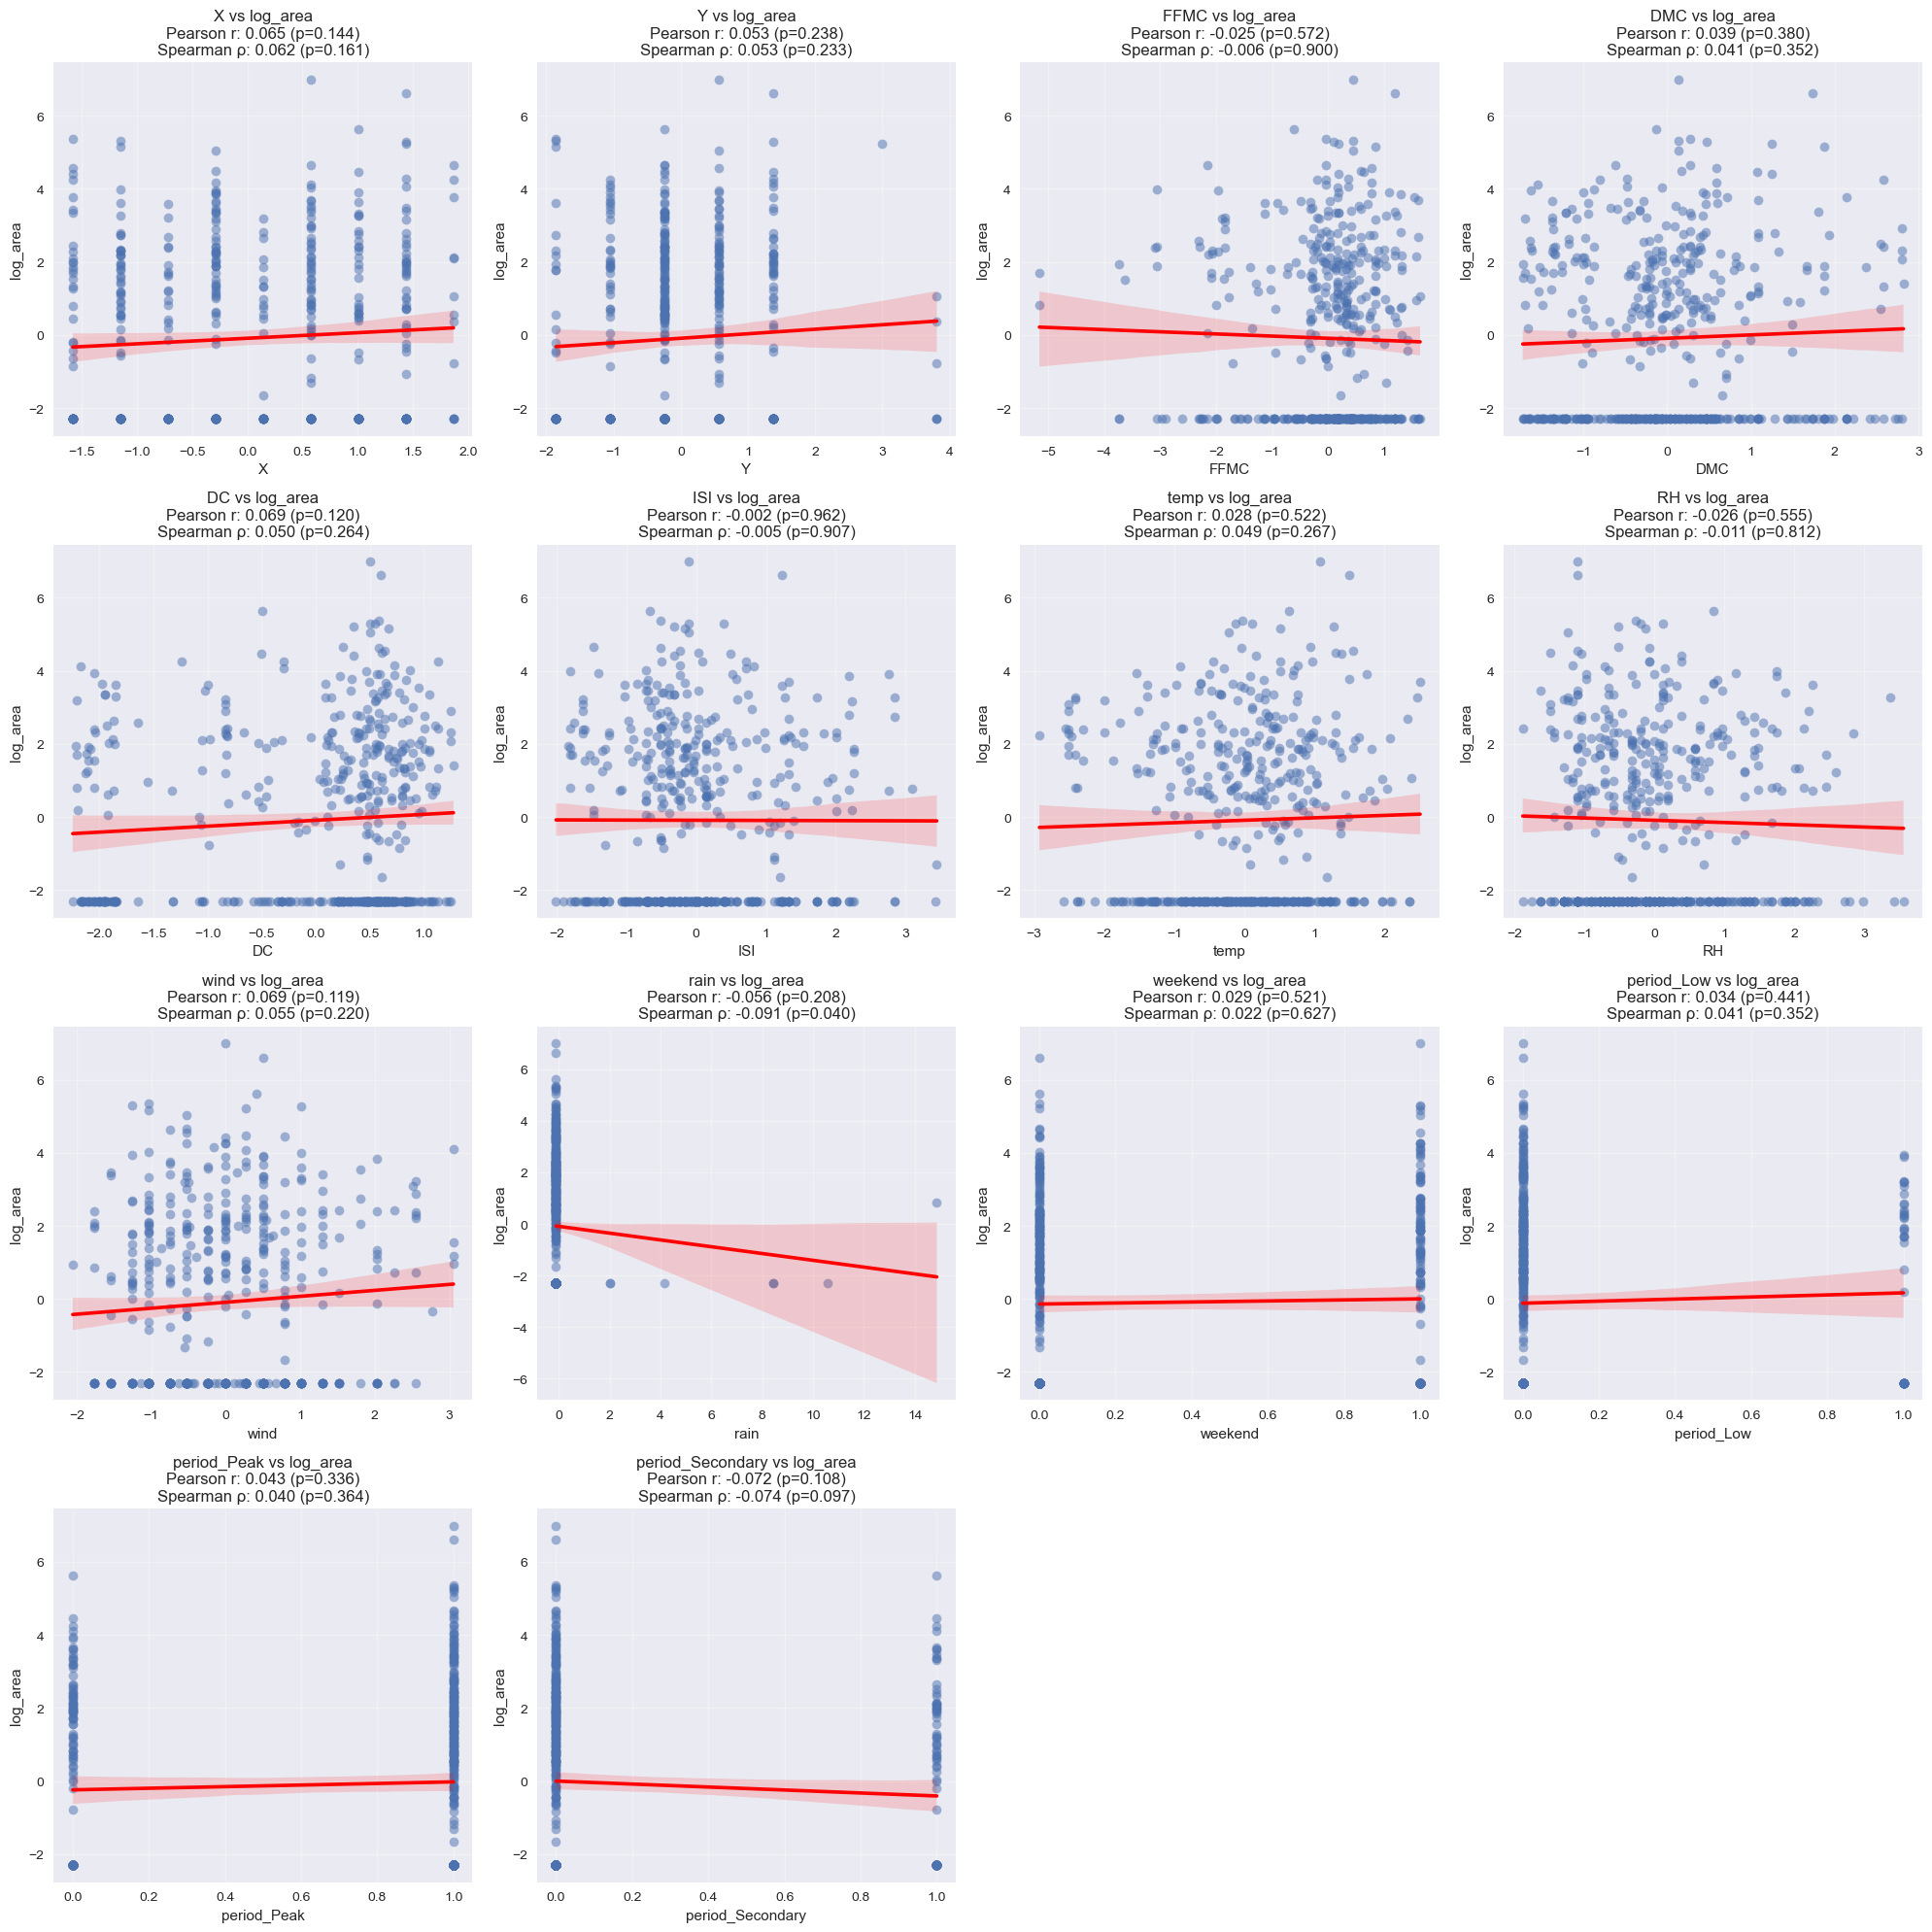

Correlation Summary (sorted by absolute Pearson correlation):


,Feature,Pearson Correlation,Pearson P-value,Spearman Correlation,Spearman P-value
13,period_Secondary,-0.0716,0.1075,-0.0737,0.0972
8,wind,0.0694,0.1187,0.0546,0.2195
4,DC,0.0692,0.1199,0.0497,0.2640
0,X,0.0649,0.1444,0.0623,0.1613
9,rain,-0.0561,0.2076,-0.0911,0.0402
1,Y,0.0526,0.2375,0.0530,0.2332
12,period_Peak,0.0429,0.3356,0.0404,0.3637
3,DMC,0.0391,0.3799,0.0414,0.3524
11,period_Low,0.0343,0.4411,0.0414,0.3523
10,weekend,0.0286,0.5209,0.0217,0.6266


In [42]:
features = final_data.drop(['area', 'log_area'], axis=1).columns
correlation_summary = analyze_feature_relationships(final_data, features, target='log_area')

print("Correlation Summary (sorted by absolute Pearson correlation):")
display(correlation_summary)

It's evident that none of the features show strong correlations (all correlations < |0.08|) and that all p-values are relatively high (> 0.05), suggesting weak statistical significance.

Despite the weak correlation I'll try and build some models based on subsets of these features.

## Subset Selection <a name="subset_selection"></a>

Now that I have a cleaned dataset with all numerical features and I've visually explored feature-outcome relationships, I can start modeling. Let's use feature selection to determine which features might be useful for generating predictions.\
I'll generate models with 2, 4, 6, 8 & 10 features, using both backward and forward selection.

In [43]:
# Assign final_data to data, to simplify the code
data = final_data

y = data['log_area']
X = data.drop(['area', 'log_area'], axis=1)

linear_model = LinearRegression()

### Forward Selector <a name="forward_selector"></a>

In [44]:
fwd_selectors = [
    SequentialFeatureSelector(estimator=linear_model,
                              n_features_to_select=n,
                              direction="forward")
    for n in range(2, 11, 2)
]

for sfs in fwd_selectors:
    sfs.fit(X, y)
    print(f"Features selected in {sfs.n_features_to_select_} feature model: {sfs.get_feature_names_out()}")

Features selected in 2 feature model: ['X' 'weekend']
Features selected in 4 feature model: ['X' 'wind' 'weekend' 'period_Secondary']
Features selected in 6 feature model: ['X' 'FFMC' 'wind' 'rain' 'weekend' 'period_Secondary']
Features selected in 8 feature model: ['X' 'Y' 'FFMC' 'RH' 'wind' 'rain' 'weekend' 'period_Secondary']
Features selected in 10 feature model: ['X' 'Y' 'FFMC' 'RH' 'wind' 'rain' 'weekend' 'period_Low' 'period_Peak'
 'period_Secondary']


### Backward Selector <a name="backward_selector"></a>

In [46]:
bwd_selectors = [
    SequentialFeatureSelector(estimator=linear_model,
                              n_features_to_select=n,
                              direction="backward")
    for n in range(2, 11, 2)
]

for sfs in bwd_selectors:
    sfs.fit(X, y)
    print(f"Features selected in {sfs.n_features_to_select_} feature model: {sfs.get_feature_names_out()}")

Features selected in 2 feature model: ['X' 'rain']
Features selected in 4 feature model: ['X' 'wind' 'rain' 'period_Peak']
Features selected in 6 feature model: ['X' 'wind' 'rain' 'weekend' 'period_Low' 'period_Peak']
Features selected in 8 feature model: ['X' 'RH' 'wind' 'rain' 'weekend' 'period_Low' 'period_Peak'
 'period_Secondary']
Features selected in 10 feature model: ['X' 'FFMC' 'DC' 'RH' 'wind' 'rain' 'weekend' 'period_Low' 'period_Peak'
 'period_Secondary']


## Developing Candidate Models <a name="developing_candidate_models"></a>

As we've seen above, the linear correlation between the features and the target (`log_area`) is very low. I'll try creating models not based on linear regression.

### LASSO <a name="lasso"></a>

Using a LASSO (Least Absolute Shrinkage and Selection Operator) model could be a good choice, for the following reasons:

* Can help with feature selection by shrinking irrelevant coefficients to exactly zero
* Useful when we have many features but suspect only a few are important
* Data has multiple related features (e.g., weather variables) where some might be redundant
* LASSO can help identify which features most influence the order of magnitude of fires

In [47]:
# Print model evaluation
def evaluate_lasso_model(model, X, y, feat_names):
    print(f"Best alpha: {model.alpha_:.4f}")
    print("\nSelected features and coefficients:")
    
    # Get non-zero coefficients
    non_zero = [(name, coef) for name, coef in zip(feat_names, model.coef_) if coef != 0]
    
    if non_zero:
        for name, coef in sorted(non_zero, key=lambda x: abs(x[1]), reverse=True):
            print(f"{name}: {coef:.4f}")
    else:
        print("No features selected (all coefficients zero)")
    
    print(f"\nR² Score: {model.score(X, y):.4f}")

In [48]:
# Prepare for cross-validation with LassoCV
# Using default 5-fold CV
lasso_cv = LassoCV(
    cv=5,
    random_state=42,
    max_iter=10000,
    alphas=np.logspace(-4, 1, 100)
)

# Scale all the features, including binary ones
X_scaled = scaler.fit_transform(X)

# Fit the model
lasso_cv.fit(X_scaled, y)

# Evaluate the model
evaluate_lasso_model(lasso_cv, X_scaled, y, features)

Best alpha: 10.0000

Selected features and coefficients:
No features selected (all coefficients zero)

R² Score: 0.0000


The LASSO coefficients are all 0, which suggests that no feature is strong enough as a predictor to `log_area`.

### Decision Tree <a name="decision_tree"></a>

I'll try a different approach - instead of treating this as a regression problem I'll reframe it as a classification problem.\
I'll start by dividing the fires into sizes by the total area burned, then try to fit a decision tree model based on the data.

The categories I've chosen are based on the fire's order of magnitude:

`1`: area = 0 $ha$\
`2`: 0 $ha$ < area <=1 $ha$\
`3`: 1 $ha$ < area <=10 $ha$\
`4`: 10 $ha$ < area <=100 $ha$\
`5`: 100 $ha$ < area$

In [49]:
# Split the area data into bins
bins = [-1, 0, 1, 10, 100, float('inf')]
data['fire_size_category'] = pd.cut(data['area'], bins=bins, labels=range(1, 6)).astype('float64')

In [50]:
# Create the classification tree
tree = DecisionTreeClassifier(
criterion = "gini",
max_depth = 4,
random_state = 764)

# Create training and testing sets
y_tree = data['fire_size_category']
X_train, X_test, y_train, y_test = train_test_split(X, y_tree, test_size=0.3, stratify=y_tree, random_state=764)

tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

#accuracy = metrics.accuracy_score(y_test, y_pred)
score = tree.score(X_test, y_test)
print(f"The tree's accuracy: {score:.2f}")

The tree's accuracy: 0.44


That score means that the tree's classification was correct 44% of the test cases. This is usually considered to be a low accuracy score, but it has potential to improve.

## K-Fold Cross-Validation Tree <a name="k_fold_cross_validation"></a>

Now that I have a few candidate models I can evaluate all of them using k-fold cross-validation. This gives a better idea about model performance on unseen datasets compared to a single train-test split.\
I'll also create a reference model to provide a baseline against which the other models will be compared. The model is a linear regression model and is based on `temp` and `wind`, to keep it simple.

In [51]:
# columns for the reference model
reference_X = data[['temp', 'wind']]

y = data['log_area']

# Generate cross-validations for the reference model
ref_cv = cross_val_score(linear_model, reference_X, data['log_area'], cv = 5, scoring = "neg_mean_squared_error")

# A list to hold all forward cross-validations
fwd_cvs = []

# Generate cross-validations for all forward selectors generated above
for fwd_selector in fwd_selectors:
    fw_cv = cross_val_score(linear_model, data[fwd_selector.get_feature_names_out()], y, cv = 5, scoring = "neg_mean_squared_error")
    fwd_cvs.append(fw_cv)


# A list to hold all backward cross-validations
bwd_cvs = []

# Generate cross-validations for all backward selectors generated above
for bwd_selector in bwd_selectors:
    bw_cv = cross_val_score(linear_model, data[bwd_selector.get_feature_names_out()], y, cv = 5, scoring = "neg_mean_squared_error")
    bwd_cvs.append(bw_cv)

# Generate cross-validation for the tree model. The scoring is different since it's a classification model
tree_cv = cross_val_score(tree, X, y_tree, cv = 5, scoring = "accuracy")

In [52]:
print(f"Reference model. Avg test MSE: {round(ref_cv.mean(), 2)}, STD: {round(ref_cv.std(), 2)}")

print("\nForward selector models:\n")
for cv, n in zip(fwd_cvs, range(2, 11, 2)):
    print(f"{n} features model. Avg test MSE: {round(cv.mean(), 2)}, STD: {round(cv.std(), 2)}")

print("\nBackward selector models:\n")
for cv, n in zip(bwd_cvs, range(2, 11, 2)):
    print(f"{n} features model. Avg test MSE: {round(cv.mean(), 2)}, STD: {round(cv.std(), 2)}")

print(f"\nClassifier tree model. Avg test accuracy: {round(tree_cv.mean(), 2)}, STD: {round(cv.std(), 2)}")

Reference model. Avg test MSE: -6.4, STD: 2.02

Forward selector models:

2 features model. Avg test MSE: -6.28, STD: 1.93
4 features model. Avg test MSE: -6.35, STD: 1.95
6 features model. Avg test MSE: -6.39, STD: 1.98
8 features model. Avg test MSE: -6.58, STD: 2.11
10 features model. Avg test MSE: -6.64, STD: 2.15

Backward selector models:

2 features model. Avg test MSE: -6.31, STD: 1.93
4 features model. Avg test MSE: -6.34, STD: 1.93
6 features model. Avg test MSE: -6.45, STD: 2.04
8 features model. Avg test MSE: -6.49, STD: 2.06
10 features model. Avg test MSE: -6.51, STD: 2.05

Classifier tree model. Avg test accuracy: 0.39, STD: 2.05


While the 2 feature models perform slightly better than their higher-dimension counterparts, all-in-all the models' performance is unsatisfactory. The minimal MSE is 6.28, which is a very large percentage the target column's range (`-2.3` - `6.99`).

Here's a plot of the best model's predictions:

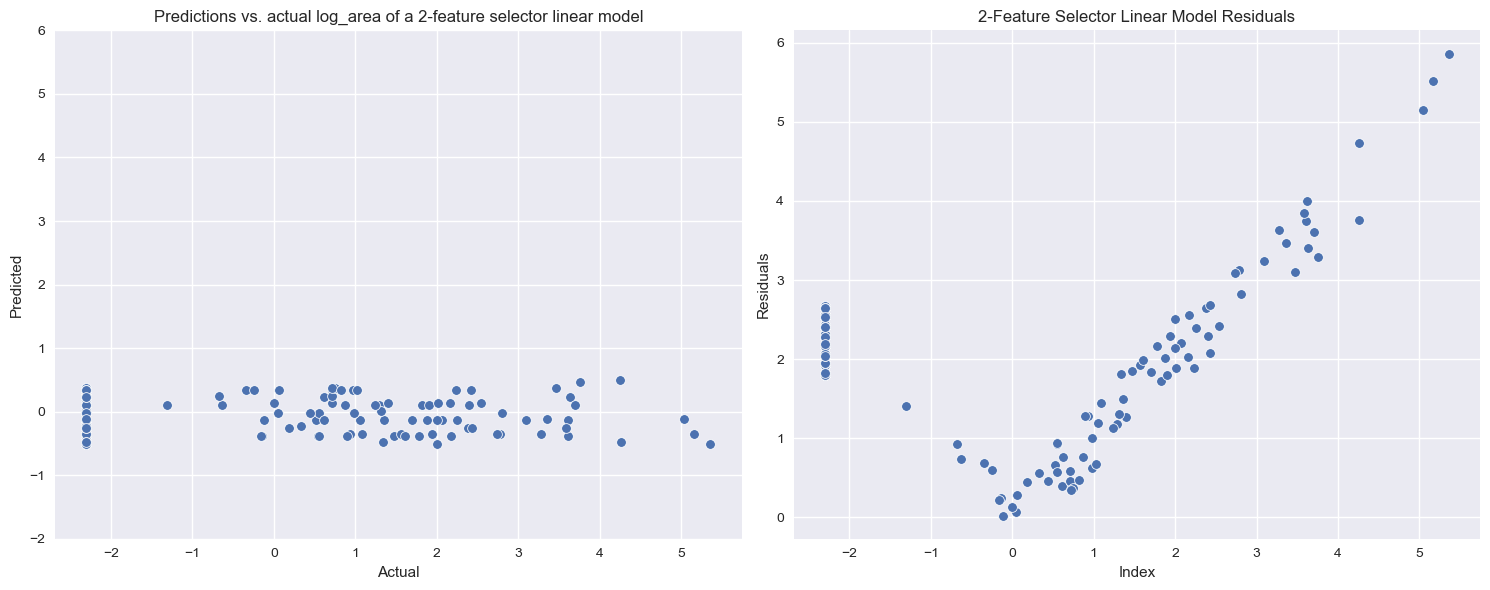

In [53]:
X = data[fwd_selectors[0].get_feature_names_out()]
y = data['log_area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=764)
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

residuals = abs(y_pred - y_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(y=y_pred, x=y_test, ax=ax1)
ax1.set_title("Predictions vs. actual log_area of a 2-feature selector linear model")
ax1.set_ylabel("Predicted")
ax1.set_ylim([-2, 6])
ax1.set_xlabel("Actual")

sns.scatterplot(y=residuals, x=y_test, ax=ax2)

ax2.set_title("2-Feature Selector Linear Model Residuals")
ax2.set_ylabel("Residuals")
ax2.set_xlabel("Index")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

the predicted values all center around 0, which aligns with the target column's mean value (-0.11). However, they don't show any significant correlation with the actual values.\
The residuals show a large variance, and while some of them can be small (when the value is near the target's mean) they paint a similar picture of an underperforming model.

## Conclusion <a name="conclusion"></a>

In this data science project, our objective was to develop a predictive model to estimate the area burned by fires, based on various features. Despite rigorous attempts and the application of different feature selection methods, the model's performance did not meet expectations. The cross-validation results across multiple models, using both linear regression and selection trees, exhibited average test Mean Squared Errors (MSE) that remained relatively high, with significant standard deviations indicating inconsistency in model performance.

This outcome, while disappointing, was anticipated. My analysis revealed that all the features in the dataset have shown low correlation with the target variable, limiting the model's ability to accurately capture the underlying patterns.

These findings highlight the necessity for additional data preprocessing, advanced feature engineering, and possibly the inclusion of more relevant features to improve model performance.\
Exploring more sophisticated models that can better handle the complexity and variability of the data may also be required. This project underscores the importance of feature relevance in predictive modeling and provides a direction for future research and development efforts.